In [1]:
import pandas as pd
from Network_cluster import Net_Spectral_clustering,Net_Hierarchical_clustering,Net_Fast_Unfolding
import scipy
import scipy.cluster.hierarchy as sch
from scipy.cluster.vq import vq,kmeans,whiten 
import matplotlib as mlp
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline
np.set_printoptions(precision=5, suppress=True)

# 1 数据准备

In [2]:
df_doctor_order = pd.read_csv('7_inhospital_doctor_order_detail.csv')
df_doctor_order.head()

D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (12,13,14,19,22,23,32,33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,HOSPITAL_CODE,PATIENT_ID,PATIENT_NO,INPATIENT_NO,SERIAL_NO,ITEM_SNOMED,SN_COMMENT,ITEM_CODE,MO_NAME,EMP_NO,...,EXEC_DPNM,UPDATED_ON,SEQ_ID,SYS_EMP_NO,DATA_VERSION,SYS_MO_NAME,SYS_DOSE_UNIT,SYS_UNIT,SYS_USE_NAME,ITEM_CLASS
0,43120181600,5300-0099001298,8007713,9311,256100,NaN,NaN,391,骨化三醇软胶囊,30212,...,干部保健科,24-5月 -18 03.20.51.000000 下午,1031512,13030212,0,NaN,NaN,NaN,口服,NaN
1,43120181600,5300-0099001298,8007713,9311,256101,NaN,NaN,292,碳酸钙D3片,30212,...,干部保健科,24-5月 -18 03.20.51.000000 下午,1031513,13030212,0,NaN,NaN,NaN,口服,NaN
2,43120181600,5300-0000043212,8007056,8562,271084,NaN,NaN,101085,酚氨咖敏片,26390,...,神经内科,24-5月 -18 03.20.51.000000 下午,1031515,13026390,0,NaN,NaN,NaN,口服,NaN
3,43120181600,0102086714,8007680,9272,255438,NaN,NaN,1615,5%葡萄糖,30348,...,呼吸内科,24-5月 -18 03.20.51.000000 下午,1031519,13030348,0,NaN,mL,NaN,NaN,NaN
4,43120181600,0102086714,8007680,9272,255439,NaN,NaN,2152,溴己新盐酸盐,30348,...,呼吸内科,24-5月 -18 03.20.51.000000 下午,1031520,13030348,0,溴己新,mg,NaN,NaN,NaN


In [3]:
df_extracted = df_doctor_order[['INPATIENT_NO','ITEM_CODE']]
df_extracted.head()

,INPATIENT_NO,ITEM_CODE
0,9311,391
1,9311,292
2,8562,101085
3,9272,1615
4,9272,2152


# 2 kmeans 聚类尝试

In [22]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 

kmeans = KMeans(n_clusters=10, random_state=10).fit(df_extracted)
df_extracted['jllable']=kmeans.labels_
df_count_type=df_extracted.groupby('jllable').apply(np.size)
 

D:\program\Anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [23]:
##各个类别的数目
df_count_type

jllable
0     1428
1    17133
2    21384
3     1200
4     9618
5     1776
6      624
7     4086
8     9321
9     9885
dtype: int64

In [24]:
##聚类中心
kmeans.cluster_centers_

array([[ 53638.87395,  22410.82563,      0.0084 ],
       [ 20537.68657,   2837.31606,      1.     ],
       [ 53890.37486,    884.10003,      0.     ],
       [ 56804.8525 , 102879.5725 ,      2.     ],
       [ 77587.28821,   4167.89551,      0.     ],
       [ 16700.12331,  21948.14696,      1.     ],
       [ 16019.13942, 102223.4375 ,      2.     ],
       [ 37991.7746 ,   2917.91189,      0.52863],
       [ 53694.7673 ,   8714.83457,      0.     ],
       [  9291.1214 ,   2664.41062,      1.     ]])

In [25]:
##新的dataframe，命名为new_df ，并输出到本地，命名为new_df.csv。
new_df=df_extracted[:]
new_df
new_df.to_csv('new_df.csv')

In [26]:
##将用于聚类的数据的特征的维度降至2维，并输出降维后的数据，形成一个dataframe名字new_pca
pca = PCA(n_components=2)
new_pca = pd.DataFrame(pca.fit_transform(new_df))

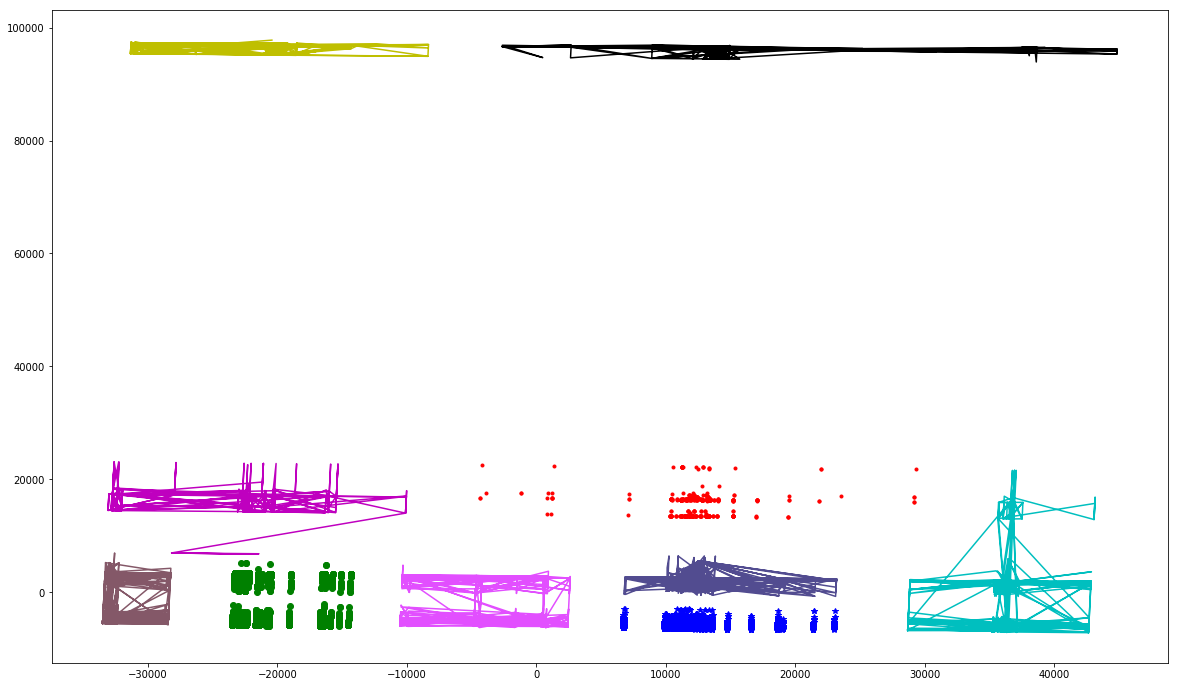

In [31]:
 
##可视化
fig = plt.figure(figsize=(20,12))
d = new_pca[new_df['jllable'] == 0]
plt.plot(d[0], d[1], 'r.')
d = new_pca[new_df['jllable'] == 1]
plt.plot(d[0], d[1], 'go')
d = new_pca[new_df['jllable'] == 2]
plt.plot(d[0], d[1], 'b*')
d = new_pca[new_df['jllable'] == 3]
plt.plot(d[0], d[1], 'k')
d = new_pca[new_df['jllable'] == 4]
plt.plot(d[0], d[1], 'c')
d = new_pca[new_df['jllable'] == 5]
plt.plot(d[0], d[1], 'm')
d = new_pca[new_df['jllable'] == 6]
plt.plot(d[0], d[1], 'y')
d = new_pca[new_df['jllable'] == 7]
plt.plot(d[0], d[1], '#e24fff')
d = new_pca[new_df['jllable'] == 8]
plt.plot(d[0], d[1], '#524C90')
d = new_pca[new_df['jllable'] == 9]
plt.plot(d[0], d[1], '#845868')
plt.gcf().savefig('kmeans.png')
plt.show()

In [7]:
df_extracted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25485 entries, 0 to 25484
Data columns (total 2 columns):
INPATIENT_NO    25485 non-null int64
ITEM_CODE       25485 non-null int64
dtypes: int64(2)
memory usage: 398.3 KB


# 3 谱聚类尝试

In [4]:
df_grouped = df_extracted.groupby('INPATIENT_NO', group_keys=False)
print(df_grouped.groups)

{8252: Int64Index([   81,    82,    83,    89,    90,    92,    93,    94,    95,
              151,
            ...
            20060, 20061, 20062, 20063, 20064, 20065, 20066, 20067, 20069,
            25327],
           dtype='int64', length=358), 8492: Int64Index([  169,   170,   172,   249,   250,   251,   252,   253,   375,
              376,
            ...
            19562, 19563, 19564, 19565, 19566, 19567, 19568, 19569, 19570,
            25240],
           dtype='int64', length=256), 8531: Int64Index([   14,    15,    49,    50,    54,    55,    56,    60,    61,
               62,
            ...
            19427, 19434, 19435, 19436, 19998, 20008, 20016, 20017, 20071,
            25325],
           dtype='int64', length=539), 8539: Int64Index([   47,    48,   155,   158,   159,   160,   161,   162,   163,
              164,
            ...
            18989, 19271, 19272, 19273, 19274, 19275, 19285, 20000, 20005,
            25329],
           dtype='int64', length=193),

In [5]:
df_list = list(df_grouped)
print(df_list)

[(8252,        INPATIENT_NO  ITEM_CODE
81             8252        683
82             8252     102911
83             8252       1623
89             8252       1623
90             8252        329
92             8252        683
93             8252     102911
94             8252     102462
95             8252     101067
151            8252       2153
152            8252       1618
156            8252        683
157            8252     102911
171            8252       1623
247            8252       2153
248            8252       1618
254            8252       2153
255            8252       1618
282            8252       3534
339            8252       3534
340            8252        702
563            8252       1274
564            8252     101019
565            8252       2233
667            8252        709
668            8252        290
669            8252        709
670            8252        290
671            8252     103083
672            8252        683
...             ...        ...


In [6]:
df_dict = dict(list(df_grouped))
print(df_dict)

{8252:        INPATIENT_NO  ITEM_CODE
81             8252        683
82             8252     102911
83             8252       1623
89             8252       1623
90             8252        329
92             8252        683
93             8252     102911
94             8252     102462
95             8252     101067
151            8252       2153
152            8252       1618
156            8252        683
157            8252     102911
171            8252       1623
247            8252       2153
248            8252       1618
254            8252       2153
255            8252       1618
282            8252       3534
339            8252       3534
340            8252        702
563            8252       1274
564            8252     101019
565            8252       2233
667            8252        709
668            8252        290
669            8252        709
670            8252        290
671            8252     103083
672            8252        683
...             ...        ...
1

In [7]:
nparray_itemCode = []
nparray_inpatient_no = []
for patient in df_list:
    nparray_itemCode.append(np.array(patient[1]['ITEM_CODE']))
    nparray_inpatient_no.append(np.array(patient[0]))
                                
nparray_itemCode = np.array(nparray_itemCode)
nparray_inpatient_no = np.array(nparray_inpatient_no)
nparray_inpatient_no

array([ 8252,  8492,  8531,  8539,  8562,  8584,  8884,  8914,  9272,
        9280,  9304,  9311,  9354, 13042, 13313, 18255, 18267, 18274,
       18573, 18634, 18688, 18854, 19096, 19117, 19363, 20064, 20273,
       20350, 20894, 20959, 21045, 21099, 22629, 25021, 25260, 25824,
       26497, 27231, 31227, 31823, 36932, 37362, 40096, 42120, 42244,
       42483, 44179, 48422, 48514, 51634, 51705, 51734, 52098, 52438,
       52484, 52588, 52802, 52811, 52823, 52926, 53006, 53096, 53105,
       53198, 53329, 53371, 53454, 53584, 53664, 53943, 54054, 54116,
       54348, 54457, 54461, 54494, 54696, 54700, 55003, 55281, 55313,
       56494, 58305, 60363, 60772, 63140, 64749, 70442, 76978, 77033,
       77151, 77392, 77657, 77840, 77924, 78095, 78133, 78221, 78857,
       84412])

In [8]:
nparray_similarity_matrix = []
for patient_items01 in nparray_itemCode:
    patient_similarity = []
    for patient_items02 in nparray_itemCode:
        patient_all_items = set(patient_items01) | set(patient_items02)
        patient_same_items = set(patient_items01) & set(patient_items02)
        similarity = len(patient_same_items) / len(patient_all_items)
        patient_similarity.append(similarity)
    nparray_similarity_matrix.append(np.array(patient_similarity))
    
nparray_similarity_matrix = np.array(nparray_similarity_matrix)
nparray_similarity_matrix

array([[1.     , 0.38889, 0.50162, ..., 0.20721, 0.38376, 0.312  ],
       [0.38889, 1.     , 0.39375, ..., 0.34737, 0.62273, 0.24   ],
       [0.50162, 0.39375, 1.     , ..., 0.23416, 0.38033, 0.28082],
       ...,
       [0.20721, 0.34737, 0.23416, ..., 1.     , 0.40234, 0.22353],
       [0.38376, 0.62273, 0.38033, ..., 0.40234, 1.     , 0.35714],
       [0.312  , 0.24   , 0.28082, ..., 0.22353, 0.35714, 1.     ]])

IndexError: too many indices for array

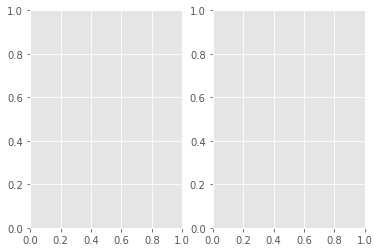

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.preprocessing import normalize
 
 
def similarity_function(points):
    """
    相似性函数，利用径向基核函数计算相似性矩阵，对角线元素置为０
    对角线元素为什么要置为０我也不清楚，但是论文里是这么说的
    :param points:
    :return:
    """
    res = rbf_kernel(points)
    for i in range(len(res)):
        res[i, i] = 0
    return res
 
 
def spectral_clustering(points, k, W):
    """
    谱聚类
    :param points: 样本点
    :param k: 聚类个数
    :return: 聚类结果
    """
#     W = similarity_function(points)
    # 度矩阵D可以从相似度矩阵W得到，这里计算的是D^(-1/2)
    # D = np.diag(np.sum(W, axis=1))
    # Dn = np.sqrt(LA.inv(D))
    # 本来应该像上面那样写，我做了点数学变换，写成了下面一行
    Dn = np.diag(np.power(np.sum(W, axis=1), -0.5))
    # 拉普拉斯矩阵：L=Dn*(D-W)*Dn=I-Dn*W*Dn
    # 也是做了数学变换的，简写为下面一行
    L = np.eye(len(points)) - np.dot(np.dot(Dn, W), Dn)
    eigvals, eigvecs = LA.eig(L)
    # 前k小的特征值对应的索引，argsort函数
    indices = np.argsort(eigvals)[:k]
    # 取出前k小的特征值对应的特征向量，并进行正则化
    k_smallest_eigenvectors = normalize(eigvecs[:, indices])
    # 利用KMeans进行聚类
    return KMeans(n_clusters=k).fit_predict(k_smallest_eigenvectors)
 
 
# X, y = make_blobs()
# X = np.nan_to_num(np.array(df_extracted))
X = np.array(nparray_itemCode)
labels = spectral_clustering(X, 3, nparray_similarity_matrix)
 
# 画图
plt.style.use('ggplot')
# 原数据
fig, (ax0, ax1) = plt.subplots(ncols=2)
ax0.scatter(X[:, 0], X[:, 1], c=y)
ax0.set_title('raw data')
# 谱聚类结果
ax1.scatter(X[:, 0], X[:, 1], c=labels)
ax1.set_title('Spectral Clustering')
plt.gcf().savefig('spectral_cluster.png')
plt.show()

# 4 Kmeans聚类简版

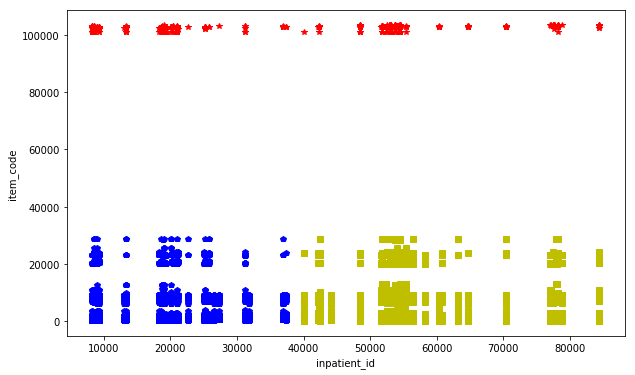

In [21]:
import numpy
#转换数据格式
tmp=numpy.array(df_extracted)
#调用python关于机器学习sklearn库中的KMeans
from sklearn.cluster import KMeans
#设置分为3类，并训练数据
kms=KMeans(n_clusters=3)
y=kms.fit_predict(tmp)
#将分类结果以散点图形式展示
fig = plt.figure(figsize=(10,6))
plt.xlabel('inpatient_id')
plt.ylabel('item_code')
for i in range(0,len(y)):
    if(y[i]==0):      
        plt.plot(tmp[i,0],tmp[i,1],"*r")
    elif(y[i]==1):      
        plt.plot(tmp[i,0],tmp[i,1],"sy")
    elif(y[i]==2):       
        plt.plot(tmp[i,0],tmp[i,1],"pb")
plt.show()


# 5 网络层次聚类

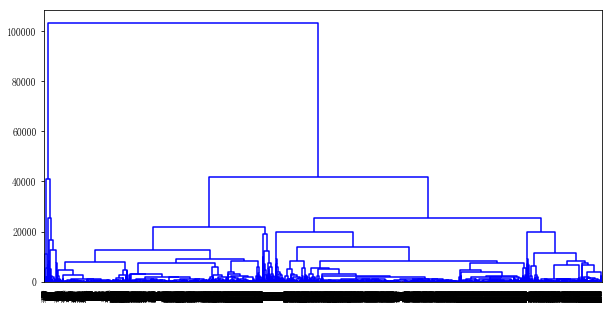

([[25314, 25412, 25351, 25354, 25355, 25393, 25364, 25435, 25439],
  [25427, 25428, 25372],
  [25464, 25433, 25371],
  [25414, 25316, 25353, 25357, 25395],
  [25426, 25430, 25432, 25434],
  [25315, 25413, 25352, 25356, 25394]],
 array([0., 0., 0., ..., 0., 0., 0.]))

In [4]:
Net_Hierarchical_clustering(df_extracted, cutoff = 0.3,metric_name='jaccard')

# 6 谱聚类示例

In [15]:
import numpy as np
from sklearn import datasets
X, y = datasets.make_blobs(n_samples=500, n_features=6, centers=5, cluster_std=[0.4, 0.3, 0.4, 0.3, 0.4], random_state=11)
X

array([[-7.76324808, -8.84656238,  4.27901582,  2.24092088, -9.01179124,
        -0.38420006],
       [-6.7332813 , -9.41315963, -0.7936109 ,  4.74079464, -1.07047174,
        -0.74584275],
       [-6.95129282, -9.51077056, -0.84525704,  4.10274755, -1.28878541,
         0.14329266],
       ...,
       [-3.52246694, -6.80041267,  4.91296278,  6.27507964, -3.01961225,
        -3.42770556],
       [ 7.76663892,  7.82404263, -6.8318606 ,  2.88728932, -9.76742041,
        -7.50407371],
       [ 8.40228838,  7.63184647, -6.50528954,  3.36423644, -9.48793872,
        -7.73365915]])

In [16]:
y

array([4, 0, 0, 2, 0, 0, 1, 2, 0, 0, 4, 4, 0, 0, 0, 2, 0, 1, 1, 1, 3, 3,
       4, 1, 3, 2, 2, 2, 0, 4, 4, 1, 0, 0, 1, 4, 4, 2, 3, 2, 2, 1, 1, 0,
       2, 3, 4, 4, 1, 3, 3, 4, 2, 2, 4, 1, 3, 3, 2, 2, 4, 3, 3, 3, 1, 0,
       2, 3, 3, 2, 3, 1, 1, 4, 0, 1, 2, 1, 2, 4, 0, 2, 3, 3, 2, 0, 0, 0,
       0, 4, 2, 0, 0, 3, 2, 1, 1, 0, 4, 0, 2, 4, 2, 4, 1, 2, 4, 4, 0, 1,
       0, 4, 2, 2, 2, 3, 4, 2, 2, 0, 4, 0, 1, 0, 0, 4, 4, 1, 4, 2, 3, 2,
       0, 3, 1, 1, 1, 1, 0, 1, 3, 4, 3, 3, 3, 3, 3, 4, 2, 1, 3, 4, 1, 4,
       2, 3, 1, 1, 1, 3, 0, 1, 4, 2, 3, 4, 2, 2, 1, 3, 3, 0, 1, 2, 2, 1,
       2, 3, 3, 2, 2, 0, 2, 0, 1, 0, 4, 0, 3, 1, 3, 1, 3, 0, 2, 4, 0, 2,
       4, 1, 3, 3, 4, 3, 4, 2, 3, 0, 2, 3, 1, 4, 1, 0, 2, 4, 3, 3, 2, 3,
       1, 1, 4, 1, 4, 4, 0, 4, 0, 1, 0, 1, 4, 3, 1, 2, 0, 1, 0, 0, 3, 0,
       1, 1, 0, 2, 1, 4, 2, 2, 4, 0, 2, 3, 0, 1, 3, 1, 1, 4, 1, 4, 1, 1,
       1, 3, 4, 4, 2, 0, 3, 3, 2, 4, 1, 0, 1, 4, 0, 4, 2, 3, 0, 1, 4, 1,
       3, 2, 4, 3, 4, 3, 3, 1, 3, 3, 3, 2, 1, 4, 4,

In [10]:
from sklearn.cluster import SpectralClustering
y_pred = SpectralClustering().fit_predict(X)
from sklearn import metrics
print("Calinski-Harabasz Score", metrics.calinski_harabaz_score(X, y_pred))

Calinski-Harabasz Score 14908.932502611722


In [12]:
for index, gamma in enumerate((0.01,0.1,1,10)):
    for index, k in enumerate((3,4,5,6)):
        y_pred = SpectralClustering(n_clusters=k, gamma=gamma).fit_predict(X)
        print("Calinski-Harabasz Score with gamma=", gamma, "n_clusters=", k,"score:", metrics.calinski_harabaz_score(X, y_pred))

Calinski-Harabasz Score with gamma= 0.01 n_clusters= 3 score: 1979.7709609161868
Calinski-Harabasz Score with gamma= 0.01 n_clusters= 4 score: 3154.0184121901607
Calinski-Harabasz Score with gamma= 0.01 n_clusters= 5 score: 23410.63894999138
Calinski-Harabasz Score with gamma= 0.01 n_clusters= 6 score: 19303.734087657893
Calinski-Harabasz Score with gamma= 0.1 n_clusters= 3 score: 1979.7709609161868
Calinski-Harabasz Score with gamma= 0.1 n_clusters= 4 score: 3154.0184121901607
Calinski-Harabasz Score with gamma= 0.1 n_clusters= 5 score: 23410.638949991386
Calinski-Harabasz Score with gamma= 0.1 n_clusters= 6 score: 19427.961894359112
Calinski-Harabasz Score with gamma= 1 n_clusters= 3 score: 1092.169913749734
Calinski-Harabasz Score with gamma= 1 n_clusters= 4 score: 210.83413736826168
Calinski-Harabasz Score with gamma= 1 n_clusters= 5 score: 23410.638949991386
Calinski-Harabasz Score with gamma= 1 n_clusters= 6 score: 19384.965772439966
Calinski-Harabasz Score with gamma=

D:\program\Anaconda\lib\site-packages\sklearn\manifold\spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


 10 n_clusters= 3 score: 41.950682271267375
Calinski-Harabasz Score with gamma= 10 n_clusters= 4 score: 83.98500420863238
Calinski-Harabasz Score with gamma= 10 n_clusters= 5 score: 30.55827447835323
Calinski-Harabasz Score with gamma= 10 n_clusters= 6 score: 47.964806377758066


In [14]:
y_pred = SpectralClustering(gamma=0.1).fit_predict(X)
print("Calinski-Harabasz Score", metrics.calinski_harabaz_score(X, y_pred))

Calinski-Harabasz Score 14961.167933623812


In [19]:
tmp

array([[  9311,   9311,   8562, ...,  78095,  77657,  78095],
       [   391,    292, 101085, ...,   8342,   6758,   9201]], dtype=int64)

# 7 谱聚类尝试2

In [12]:
_,label = Net_Spectral_clustering(pd.DataFrame(nparray_similarity_matrix), nclusters=3, affinity_v='precomputed')
label

D:\Anaconda3\lib\site-packages\sklearn\cluster\spectral.py:442: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"


array([0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 2, 2, 0, 2, 0, 1, 1, 1, 0, 2, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0,
       0, 0, 2, 2, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 2, 0, 1, 0, 1, 1, 1, 2, 1, 0, 0, 2, 2, 2, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0])

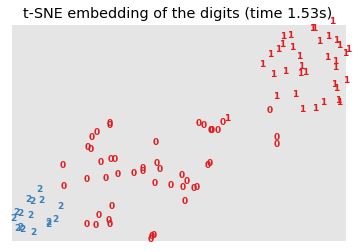

In [17]:
from sklearn.manifold import TSNE
from time import time

def plot_embedding(data, label, title):
    x_min, x_max = np.min(data, 0), np.max(data, 0)
    data = (data - x_min) / (x_max - x_min)

    fig = plt.figure()
    ax = plt.subplot(111)
    for i in range(data.shape[0]):
        plt.text(data[i, 0], data[i, 1], str(label[i]),
                 color=plt.cm.Set1(label[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})
    plt.xticks([])
    plt.yticks([])
    plt.title(title)
    return fig

tsne = TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
result = tsne.fit_transform(nparray_similarity_matrix)
fig = plot_embedding(result, label, 't-SNE embedding of the digits (time %.2fs)'% (time() - t0))
plt.show(fig)

# 8 Fast Unfolding 尝试

In [18]:
Net_Fast_Unfolding(pd.DataFrame(nparray_similarity_matrix))

([[0,
   2,
   3,
   5,
   21,
   23,
   27,
   29,
   31,
   34,
   42,
   45,
   52,
   62,
   63,
   66,
   67,
   99,
   71,
   86,
   81,
   70,
   92,
   94,
   95],
  [1,
   8,
   9,
   15,
   16,
   17,
   20,
   22,
   24,
   28,
   30,
   38,
   49,
   50,
   53,
   54,
   55,
   56,
   57,
   58,
   59,
   61,
   64,
   65,
   69,
   90,
   74,
   76,
   77,
   78,
   80,
   82,
   88,
   89,
   91,
   98,
   93,
   97],
  [4,
   6,
   7,
   10,
   11,
   12,
   13,
   14,
   18,
   19,
   25,
   26,
   32,
   33,
   35,
   36,
   37,
   39,
   40,
   41,
   43,
   44,
   46,
   47,
   48,
   51,
   60,
   72,
   79,
   83,
   84,
   85,
   68,
   75,
   73,
   87,
   96]],
 ['0', '1', '2'],
 0.12017635046556303,
 {'0': ['0',
   '2',
   '3',
   '5',
   '21',
   '23',
   '27',
   '29',
   '31',
   '34',
   '42',
   '45',
   '52',
   '62',
   '63',
   '66',
   '67',
   '99',
   '71',
   '86',
   '81',
   '70',
   '92',
   '94',
   '95'],
  '1': ['1',
   '8',
   '9',
   '15',
 

# 9 根据谱聚类结果对病人对应的医嘱开药有无情况进行格式化类比展示

In [20]:
set_all_items = set()
for items in nparray_itemCode:
    set_all_items = set_all_items | set(items)
len(set_all_items)

1030